In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

In [3]:

#Metadaten einlesen
df = pd.read_csv("NIHMS841832-supplement-1.csv", sep=',')
    
#Ergebnisse des Feature Tables einlesen
feature = pd.read_csv('feature_table.txt', sep='\t').T
feature = feature[1:][:-1]

feature

,0,1,2,3,4,5,6,7,8,9,...,3101,3102,3103,3104,3105,3106,3107,3108,3109,3110
1629.SubjectIBD335,34292,20670,18413,9981,7071,6881,5411,5335,5289,4741,...,0,0,0,0,0,0,0,0,0,0
1629.SubjectIBD643,15243,64328,0,0,0,4,4507,3216,15630,199,...,0,0,0,0,0,0,0,0,0,0
1629.SubjectIBD539,22182,21589,0,1365,0,11501,33619,3638,5053,0,...,0,0,0,0,0,0,0,0,0,0
1629.SubjectIBD078,0,805,0,0,0,4,330,2305,0,8,...,0,0,0,0,0,0,0,0,0,0
1629.SubjectIBD671,0,19734,0,0,0,0,215,0,0,699,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629.SubjectIBD421,5154,12101,1572,62,190,1448,6316,2205,1885,0,...,0,0,0,0,0,0,0,0,0,0
1629.SubjectIBD202,14565,24920,3543,0,0,0,63,0,37768,48660,...,0,0,0,0,0,0,0,0,0,0
1629.SubjectIBD544,32,52,31,0,0,2,18543,0,3,45,...,0,0,0,0,0,0,0,0,946,31
1629.SubjectIBD422,5718,18420,9534,0,0,0,4791,2770,0,588,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Gesunde Kontrollgruppe
HC = df[df.ibd_subtype.eq("HC")]

y = []
for row in feature.index:
    if any(True for val in HC['sample_name'] if val == row):
        y.append(1)
    else:
        y.append(0)

X = feature.iloc[:, :].values  


In [32]:
#Split Test und Trainingsdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Train
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Accuracy Trainingsdaten:

[[465   0]
 [  0  45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       465
           1       1.00      1.00      1.00        45

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



Accuracy Testdaten:

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       154
           1       0.38      0.71      0.49        17

    accuracy                           0.85       171
   macro avg       0.67      0.79      0.70       171
weighted avg       0.91      0.85      0.87       171

Accuracy Score:
0.8538011695906432


Confusion Matrix:
[[134  20]
 [  5  12]]


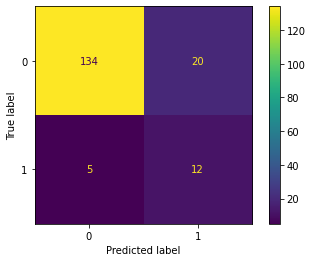

In [33]:
#Test
y_pred = classifier.predict(X_test)
predict_train = classifier.predict(X_train)

#Evaluation Train Data
print(color.RED + "Accuracy Trainingsdaten:" + color.END +"\n")
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train) +"\n\n")

#Evaluation Test Data
#The count of true negatives is C0,0 , false negatives is C1,0 , true positives is C1,1 and false positives is C0,1
print(color.RED + "Accuracy Testdaten:" + color.END +"\n")
print(classification_report(y_test, y_pred))
print(color.RED + "Accuracy Score:" + color.END)
print(accuracy_score(y_test, y_pred))
print("\n")

print(color.RED + "Confusion Matrix:" + color.END)
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(classifier, X_test, y_test, values_format=',.0f')  
plt.show()

In [1]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [35]:
f1 = 0.0
n = 100
for i in range(0, n):
    #Split Test und Trainingsdaten
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = None)

    #Train
    classifier = svm.SVC(kernel='linear')
    classifier.fit(X_train, y_train)
    
    #Test
    y_pred = classifier.predict(X_test)
    predict_train = classifier.predict(X_train)
    f1 += f1_score(y_test, y_pred, average='macro')
f1 = f1/n
print("f1-score = "+str(f1))

f1-score = 0.694900670284734
